In [3]:
import pandas as pd
import numpy as np
import sklearn

In [4]:
new_test_data = pd.read_csv("test.csv")
new_test_data

,City,State,Country,Bandwidth Tier-1\nMbps,Bandwidth Tier-2\nMbps,Unnamed: 5,Product Type request
0,Rancho Mirage,CA,US,300,1000,NaN,DIA - Dedicated Internet Access
1,Rancho Mirage,CA,US,300,1000,NaN,NaN
2,Southfield,MI,US,50,100,NaN,NaN
3,Southfield,MI,US,50,100,NaN,NaN
4,Los Angeles,CA,US,10000,1000,NaN,NaN
...,...,...,...,...,...,...,...
137,Seoul,Seoul,South Korea,300,300,NaN,NaN
138,Taipei City,Taiwan,Taiwan,200,200,NaN,NaN
139,Taipei City,Taiwan,Taiwan,200,200,NaN,NaN
140,Bangkok,Thailand,Thailand,100,100,NaN,NaN


In [5]:
temp_data = new_test_data

In [6]:
new_test_data.columns

Index(['City', 'State', 'Country', 'Bandwidth Tier-1\nMbps',
       'Bandwidth Tier-2\nMbps', 'Unnamed: 5', 'Product Type request'],
      dtype='object')

In [7]:
new_test_data.rename(columns={
    'Bandwidth Tier-1\nMbps': 'Bandwidth_Tier_1_Mbps',
    'Bandwidth Tier-2\nMbps': 'Bandwidth_Tier_2_Mbps',
    'Unnamed: 5': 'Unknown_Column',  # Rename or drop if unnecessary
    'Product Type request': 'Product_Type_Request'
}, inplace=True)

print(new_test_data.columns)  # Verify the new column names


Index(['City', 'State', 'Country', 'Bandwidth_Tier_1_Mbps',
       'Bandwidth_Tier_2_Mbps', 'Unknown_Column', 'Product_Type_Request'],
      dtype='object')


In [8]:
new_test_data.drop(columns=['Unknown_Column', 'Product_Type_Request', 'Bandwidth_Tier_2_Mbps', 'Country', 'City'], inplace=True)

In [9]:
new_test_data['Provider'] = 1295
new_test_data['Term'] = 12
new_test_data['generalized_Cir'] = 'DIA' 


In [10]:
state_country_map = {

    'CA': 'CA', 'MI': 'MI', 'NC': 'NC', 'AR': 'AR', 'FL': 'FL', 'NY': 'NY',
    'NJ': 'NJ', 'GA': 'GA', 'CO': 'CO', 'VA': 'VA', 'SC': 'SC', 'PA': 'PA',
    'NV': 'NV', 'HI': 'HI',
    'ARG': 'Argentina', 'Argentina': 'Argentina',
    'BR': 'Brazil', 'Sao Paulo': 'Brazil', 'SP': 'Brazil',
    'Mexico': 'Mexico', 'BC': 'Mexico',

    # Australia
    'NSW': 'Australia', 'VIC': 'Australia',

    # Austria
    'Vienna': 'Austria',

    # Belgium
    'Brussels': 'Belgium',

    # Croatia
    'Croatia': 'Croatia',

    # UK & London
    '1': 'United Kingdom', 'LND': 'United Kingdom', 'UK': 'United Kingdom', 'London': 'United Kingdom',

    # Greece
    'GR': 'Greece',

    # Hungary
    'Hungary': 'Hungary',

    # Israel
    'DB': 'Israel', 'ISRAEL': 'Israel',

    # Norway
    'Oslo': 'Norway',

    # Russia
    'Russia': 'Russia',

    # Serbia
    'Serbia': 'Serbia',

    # Slovenia
    'Slovenia': 'Slovenia',

    # South Africa
    'ZAF': 'South Africa', 'GT': 'South Africa',

    # Switzerland
    'Switzerland': 'Switzerland',

    # Hong Kong
    'HK': 'Hong Kong', 'NT': 'Hong Kong', 'Hong Kong': 'Hong Kong',

    # India
    'IN': 'India', '13': 'India', 'Gurgaon': 'India', 'India': 'India', 'Maharashtra': 'India',

    # Malaysia
    'Selangor': 'Malaysia',

    # Philippines
    'METRO MANILA': 'Philippines', 'Metro Manila': 'Philippines',

    # Singapore
    'SG': 'Singapore', 'Singapore': 'Singapore',

    # South Korea
    'Seoul': 'South Korea',

    # Taiwan
    'Taiwan': 'Taiwan',

    # Thailand
    'Thailand': 'Thailand',
}

new_test_data['State'] = new_test_data['State'].str.lower().map(lambda x: state_country_map.get(x, x))



In [11]:
new_test_data

,State,Bandwidth_Tier_1_Mbps,Provider,Term,generalized_Cir
0,ca,300,1295,12,DIA
1,ca,300,1295,12,DIA
2,mi,50,1295,12,DIA
3,mi,50,1295,12,DIA
4,ca,10000,1295,12,DIA
...,...,...,...,...,...
137,seoul,300,1295,12,DIA
138,taiwan,200,1295,12,DIA
139,taiwan,200,1295,12,DIA
140,thailand,100,1295,12,DIA


In [12]:
new_test_data['generalized_Cir'] = new_test_data['generalized_Cir'].astype(str).str.lower()

In [13]:
column_mapping = {
    'State': 'A Loc State',
}

# Rename columns in test_data
new_test_data.rename(columns=column_mapping, inplace=True)

# Verify the updated column names
print(new_test_data.columns)


Index(['A Loc State', 'Bandwidth_Tier_1_Mbps', 'Provider', 'Term',
       'generalized_Cir'],
      dtype='object')


In [14]:
import pickle

with open("model_and_encoders/label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

print(label_encoders.keys())


dict_keys(['A Loc State', 'generalized_Cir'])


/Users/dhruv/Dhruv/Apcela/NER/myenv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
# Ensure test_data exists
for col in ['A Loc State', 'generalized_Cir']:
    if col in new_test_data.columns:
        new_test_data[col + '_Freq'] = new_test_data[col].map(
            lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
        )


In [16]:
new_test_data['A Loc State'].unique()

array(['ca', 'mi', 'nc', 'ar', 'fl', 'ny', 'nj', 'ga', 'co', 'va', 'sc',
       'pa', 'nv', 'hi', 'arg', 'argentina', 'br', 'sao paulo', 'sp',
       'mexico', 'bc', 'nsw', 'vic', 'vienna', 'brussels', 'croatia',
       'United Kingdom', 'lnd', 'uk', 'london', 'gr', 'hungary', 'db',
       'israel', 'oslo', 'russia', 'serbia', 'slovenia', 'zaf', 'gt',
       'switzerland', 'hk', 'nt', 'hong kong', 'in', 'India', 'gurgaon',
       'india', 'maharashtra', 'selangor', 'metro manila', 'sg',
       'singapore', 'seoul', 'taiwan', 'thailand'], dtype=object)

In [17]:
new_test_data['A Loc State_Freq'].unique()

array([ 4, 33, 36, -1, 14, 43, 41, 16,  8, 67, 55, 49, 32, 65, 24, 54, 60,
       19, 21, 61])

In [18]:
new_test_data[(new_test_data['A Loc State_Freq'] == -1)]

,A Loc State,Bandwidth_Tier_1_Mbps,Provider,Term,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq
20,ar,100,1295,12,dia,-1,2
21,ar,100,1295,12,dia,-1,2
58,nv,10000,1295,12,dia,-1,2
59,nv,10000,1295,12,dia,-1,2
64,hi,200,1295,12,dia,-1,2
...,...,...,...,...,...,...,...
135,singapore,100,1295,12,dia,-1,2
136,seoul,300,1295,12,dia,-1,2
137,seoul,300,1295,12,dia,-1,2
140,thailand,100,1295,12,dia,-1,2


In [19]:
# Extract indexes where 'A Loc State_Freq' is -1
removed_indexes = new_test_data[new_test_data['A Loc State_Freq'] == -1].index.tolist()

# Filter the DataFrame
new_test_data = new_test_data[new_test_data['A Loc State_Freq'] != -1]

# Print or use the list of removed indexes
print(removed_indexes)


[20, 21, 58, 59, 64, 65, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 141]


In [20]:
new_test_data.drop(columns=['A Loc State', 'generalized_Cir'], inplace=True)

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_8469/829724588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data.drop(columns=['A Loc State', 'generalized_Cir'], inplace=True)


In [21]:
new_test_data

,Bandwidth_Tier_1_Mbps,Provider,Term,A Loc State_Freq,generalized_Cir_Freq
0,300,1295,12,4,2
1,300,1295,12,4,2
2,50,1295,12,33,2
3,50,1295,12,33,2
4,10000,1295,12,4,2
...,...,...,...,...,...
118,1000,1295,12,19,2
119,600,1295,12,19,2
123,200,1295,12,21,2
138,200,1295,12,61,2


In [22]:
features_inorder = [
    'Bandwidth_Tier_1_Mbps', 'Term', 'A Loc State_Freq', 
    'Provider',
    'generalized_Cir_Freq'
]

In [23]:
import joblib

best_xgb= joblib.load("./model_and_encoders/best_xgb_model.pkl")
print("Model loaded successfully.")

X_test = new_test_data[features_inorder]

y_pred = best_xgb.predict(X_test)
y_pred

Model loaded successfully.


/Users/dhruv/Dhruv/Apcela/NER/myenv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:49:40] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


array([2144.2693, 2144.2693, 1487.3116, 1487.3116, 1384.1774, 1384.1774,
       2300.6038, 2300.6038, 1384.1774, 2169.6682, 2504.0054, 2504.0054,
       2219.046 , 2219.046 , 2618.307 , 2618.307 , 2300.6038, 2300.6038,
       4212.508 , 2504.0054, 2203.6526, 4053.0813, 2144.2693, 2144.2693,
       4098.5386, 2719.1467, 4098.5386, 4053.0813, 2219.046 , 2172.7034,
        601.6961,  601.6961, 2634.7043, 1773.3376, 1903.4955, 2226.5073,
       2226.5073, 3723.8499, 3723.8499, 2337.3577, 2219.046 , 1577.6674,
       1781.4149, 2634.7043, 2928.3145, 2409.2046, 2449.9114, 3723.8499,
       3723.8499, 2169.6682, 2169.6682, 2618.307 , 2212.057 , 2212.057 ,
       2219.046 , 2219.046 , 2300.6038, 1950.978 , 2090.3103, 2219.046 ,
       2386.5562, 2386.5562, 2212.057 , 8799.784 , 8799.784 , 2071.732 ,
       2071.732 , 5138.379 , 2310.1804, 2310.1804, 1423.307 , 1730.8533,
       2569.1084, 2589.042 , 2454.7305, 1545.1528, 1545.1528],
      dtype=float32)

In [24]:
temp_data = temp_data.drop(index=removed_indexes)

# Reset index (optional, if you want a clean index after removal)
temp_data = temp_data.reset_index(drop=True)


In [25]:
temp_data['prediction'] = y_pred

In [26]:
temp_data

,A Loc State,Bandwidth_Tier_1_Mbps,Provider,Term,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq,prediction
0,ca,300,1295,12,dia,4,2,2144.269287
1,ca,300,1295,12,dia,4,2,2144.269287
2,mi,50,1295,12,dia,33,2,1487.311646
3,mi,50,1295,12,dia,33,2,1487.311646
4,ca,10000,1295,12,dia,4,2,1384.177368
...,...,...,...,...,...,...,...,...
72,hong kong,1000,1295,12,dia,19,2,2569.108398
73,hong kong,600,1295,12,dia,19,2,2589.041992
74,india,200,1295,12,dia,21,2,2454.730469
75,taiwan,200,1295,12,dia,61,2,1545.152832


In [27]:
temp_data.to_csv('AT&T.csv', index=False)  # index=False prevents writing row indices


In [28]:
import pandas as pd
final_prediction_data = pd.read_csv('test_prediction/final.csv')
final_prediction_data

,A Loc State,Bandwidth_Tier_1_Mbps,Provider,Term,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq,Zayo_prediction,Verizon_prediction,Century_prediction,Colt_prediction,AT&T_prediction,Unnamed: 12
0,ca,300,1419.0,12,DIA,4,1,7365.00830,2354.3386,848.53455,3038.07900,3694.60400,NaN
1,ca,300,1419.0,12,DIA,4,1,7365.00830,2354.3386,848.53455,3038.07900,3694.60400,NaN
2,mi,50,1419.0,12,DIA,33,1,718.28280,1320.4321,1227.97610,758.39813,1088.13700,NaN
3,mi,50,1419.0,12,DIA,33,1,718.28280,1320.4321,1227.97610,758.39813,1088.13700,NaN
4,ca,10000,1419.0,12,DIA,4,1,5487.52700,4151.6220,5808.99000,4759.35900,4208.68260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,hong kong,1000,1419.0,12,DIA,19,1,1641.93530,2315.2050,1294.23200,908.60430,1301.17180,NaN
73,hong kong,600,1419.0,12,DIA,19,1,1627.41560,1889.8790,960.34686,863.42250,1356.67900,NaN
74,india,200,1419.0,12,DIA,21,1,767.41595,1667.0642,634.23510,617.16560,981.63666,NaN
75,taiwan,200,1419.0,12,DIA,61,1,567.59454,1015.5809,251.40776,486.95960,727.67390,NaN


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_8469/2544490614.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis", label=f'dataPoint_{i}')
/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_8469/2544490614.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis", label=f'dataPoint_{i}')
/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_8469/2544490614.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis", label=f'dataPoint_{i}')
/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_8469/2544490614.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis", label=f'dataPoint_{i}')
/var/folders/t2/q9fs839s4l96y0sbpzp96jr4

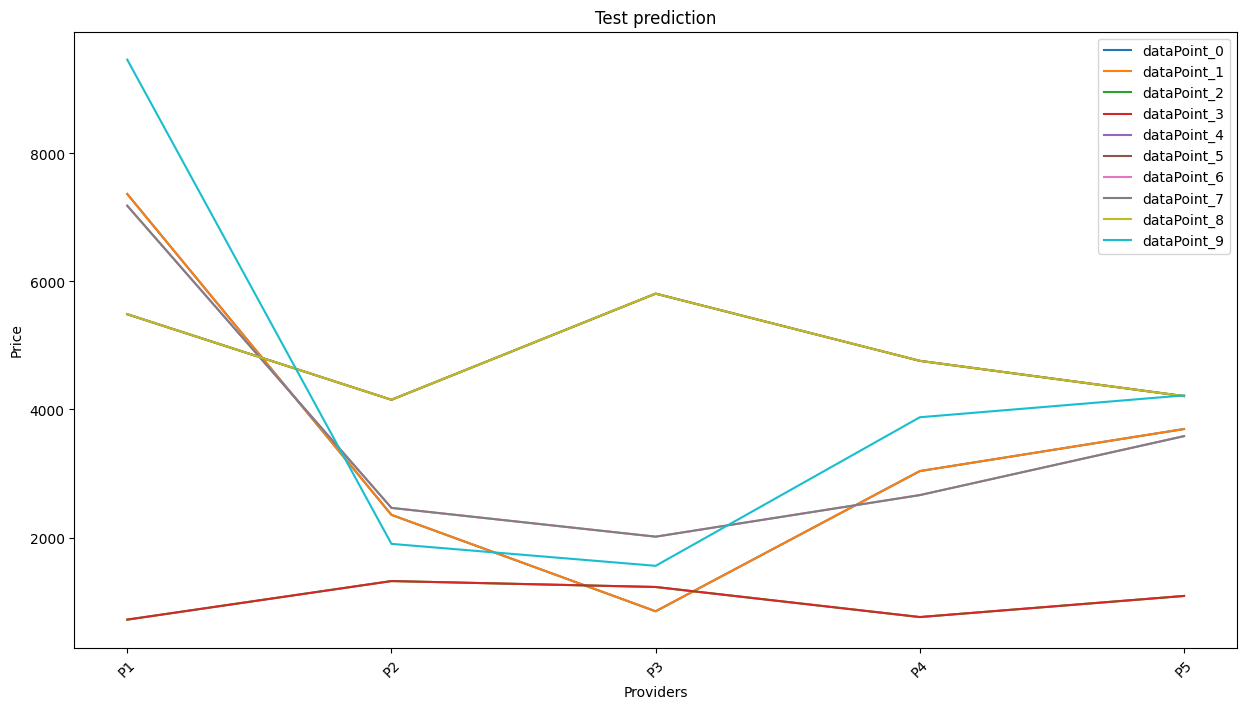

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

providers = ['P1', 'P2', 'P3', 'P4', 'P5']
plt.figure(figsize=(15, 8))
for i in range(10):

    values = final_prediction_data.iloc[i,7:12]

    
    sns.lineplot(x=providers, y=values, palette="viridis", label=f'dataPoint_{i}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title("Test prediction")
    plt.xlabel("Providers")
    plt.ylabel("Price")
    
plt.show()